In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%load_ext lab_black

In [2]:
from fastai import *
from fastai.vision import *
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [3]:
tqdm.pandas()

In [4]:
path_template = "s3://autofocus/lpz_data/labels_2012_2016_2017__{}.parquet"

In [5]:
train_df = pd.read_parquet(path_template.format("train"))
train_df.head()

,date,tags,location,is_val
path,,,,
/autofocus/data/lpz_2012-2014/raw/FA12/DPT/D02-HUP1/D02-HUP1-FA12 (10).JPG,2012-10-10,[],HUP1,False
/autofocus/data/lpz_2012-2014/raw/FA12/DPT/D02-HUP1/D02-HUP1-FA12 (100).JPG,2012-10-12,[bird],HUP1,False
/autofocus/data/lpz_2012-2014/raw/FA12/DPT/D02-HUP1/D02-HUP1-FA12 (1000).JPG,2012-10-29,[bird],HUP1,False
/autofocus/data/lpz_2012-2014/raw/FA12/DPT/D02-HUP1/D02-HUP1-FA12 (1001).JPG,2012-10-29,[bird],HUP1,False
/autofocus/data/lpz_2012-2014/raw/FA12/DPT/D02-HUP1/D02-HUP1-FA12 (1002).JPG,2012-10-29,[bird],HUP1,False


In [6]:
val_df = pd.read_parquet(path_template.format("val"))
val_df.head()

,date,tags,location,is_val
path,,,,
/autofocus/data/lpz_2012-2014/raw/FA12/DPT/D03-AFP1/D03-AFP1-FA12 (111).JPG,2012-10-12,[dog],AFP1,True
/autofocus/data/lpz_2012-2014/raw/FA12/DPT/D03-AFP1/D03-AFP1-FA12 (112).JPG,2012-10-12,[dog],AFP1,True
/autofocus/data/lpz_2012-2014/raw/FA12/DPT/D03-AFP1/D03-AFP1-FA12 (113).JPG,2012-10-12,[dog],AFP1,True
/autofocus/data/lpz_2012-2014/raw/FA12/DPT/D03-AFP1/D03-AFP1-FA12 (114).JPG,2012-10-12,[],AFP1,True
/autofocus/data/lpz_2012-2014/raw/FA12/DPT/D03-AFP1/D03-AFP1-FA12 (115).JPG,2012-10-12,[dog],AFP1,True


In [7]:
df = pd.concat((train_df, val_df))

In [10]:
learn = load_learner("models")

In [12]:
learn.data = (
    ImageList.from_df(df=df.reset_index(), path="/", cols="path")
    .split_from_df("is_val")
    .label_from_df("tags")
    .transform(get_transforms(), size=224)
    .databunch(bs=256)
    .normalize(imagenet_stats)
)

In [21]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (134849 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: MultiCategoryList
,bird,bird,bird,bird
Path: /;

Valid: LabelList (10999 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: MultiCategoryList
dog,dog,dog,,dog
Path: /;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (re

In [14]:
stuff = learn.get_preds()

In [18]:
probs, labels = stuff

In [35]:
learn.data.classes

['beaver_muskrat_woodchuck',
 'bird',
 'cat',
 'chipmunk',
 'coyote',
 'deer',
 'dog',
 'fox',
 'human',
 'livestock',
 'mink',
 'mouse',
 'opossum',
 'rabbit',
 'raccoon',
 'rat',
 'skunk',
 'squirrel']

In [37]:
probs_human = probs[:, 8]

accuracy at 50.0%: 0.9996363305755068
precision at 50.0%: nan
recall at 50.0%: 0.0


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]


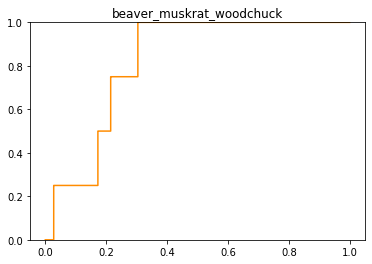

accuracy at 50.0%: 0.9636330575506864
precision at 50.0%: 0.8497109826589595
recall at 50.0%: 0.2821497120921305


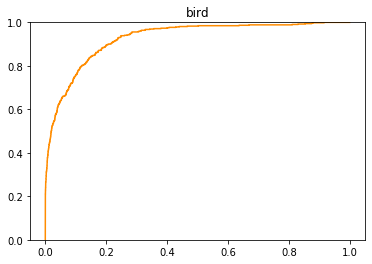

accuracy at 50.0%: 0.9969997272479316
precision at 50.0%: 0.6
recall at 50.0%: 0.08823529411764706


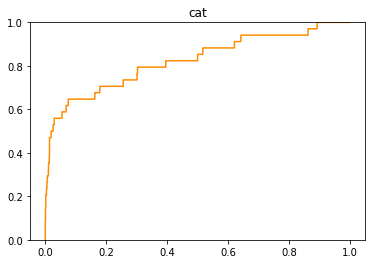

accuracy at 50.0%: 0.9987271570142741
precision at 50.0%: nan
recall at 50.0%: 0.0


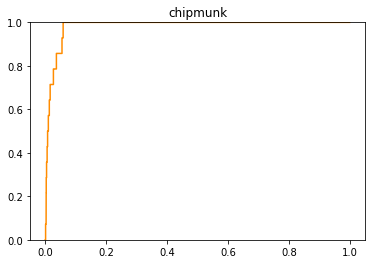

accuracy at 50.0%: 0.9882716610600963
precision at 50.0%: 0.5815217391304348
recall at 50.0%: 0.6729559748427673


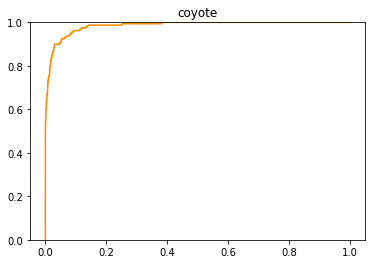

accuracy at 50.0%: 0.9763614874079461
precision at 50.0%: 0.9722991689750693
recall at 50.0%: 0.5840266222961731


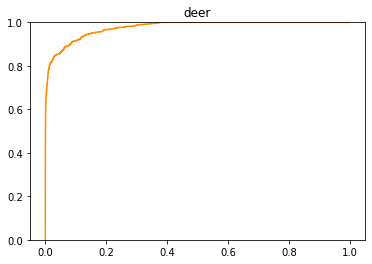

accuracy at 50.0%: 0.983998545322302
precision at 50.0%: 0.7230769230769231
recall at 50.0%: 0.5361216730038023


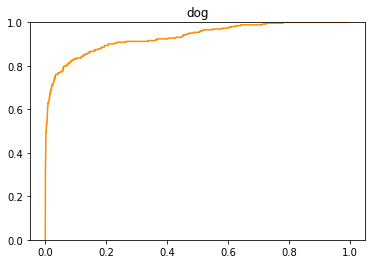

accuracy at 50.0%: 0.9996363305755068
precision at 50.0%: nan
recall at 50.0%: 0.0


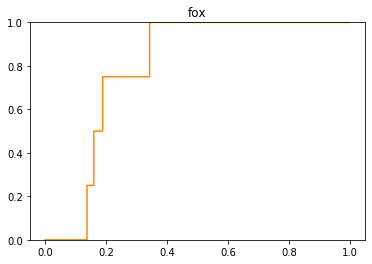

accuracy at 50.0%: 0.9614510410037276
precision at 50.0%: 0.8908205841446454
recall at 50.0%: 0.8275193798449613


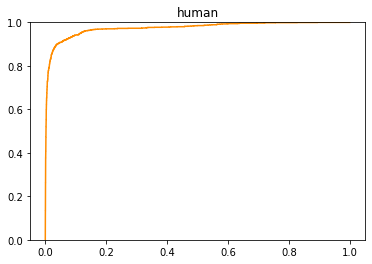

accuracy at 50.0%: 1.0
precision at 50.0%: nan
recall at 50.0%: nan


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  


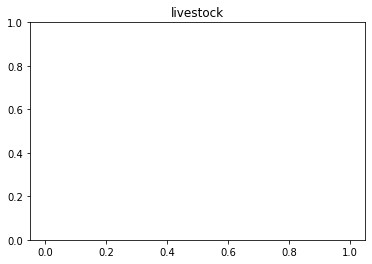

accuracy at 50.0%: 1.0
precision at 50.0%: nan
recall at 50.0%: nan


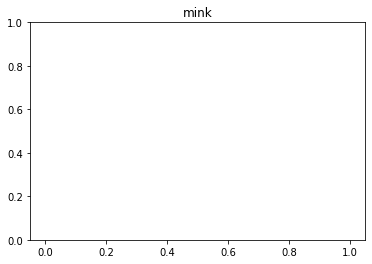

accuracy at 50.0%: 0.9982725702336576
precision at 50.0%: nan
recall at 50.0%: 0.0


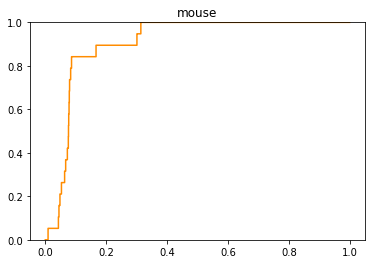

accuracy at 50.0%: 0.9699972724793163
precision at 50.0%: 0.8325358851674641
recall at 50.0%: 0.37100213219616207


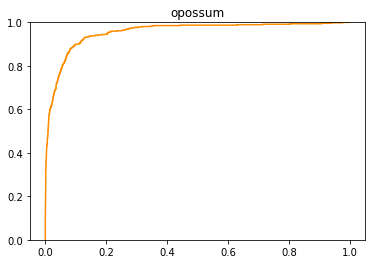

accuracy at 50.0%: 0.9876352395672334
precision at 50.0%: 0.525
recall at 50.0%: 0.15217391304347827


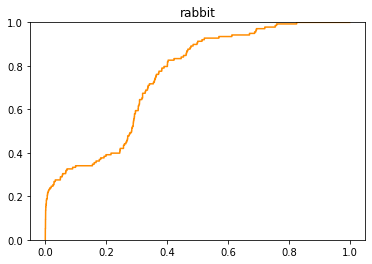

accuracy at 50.0%: 0.9809982725702336
precision at 50.0%: 0.8961424332344213
recall at 50.0%: 0.634453781512605


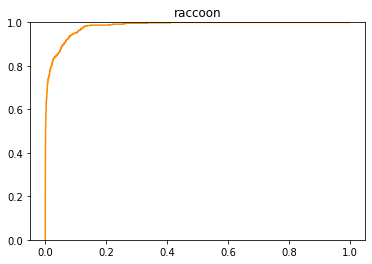

accuracy at 50.0%: 0.9996363305755068
precision at 50.0%: nan
recall at 50.0%: 0.0


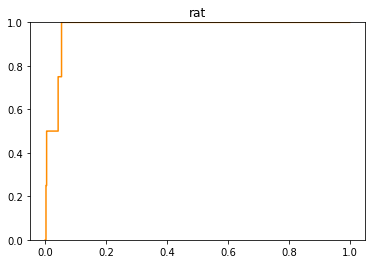

accuracy at 50.0%: 0.9984544049459042
precision at 50.0%: 0.7142857142857143
recall at 50.0%: 0.25


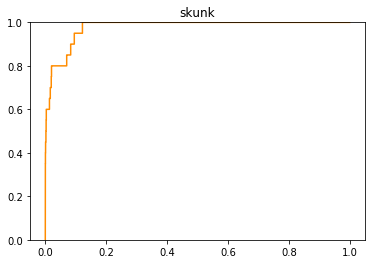

accuracy at 50.0%: 0.9520865533230294
precision at 50.0%: 0.5447284345047924
recall at 50.0%: 0.5849056603773585


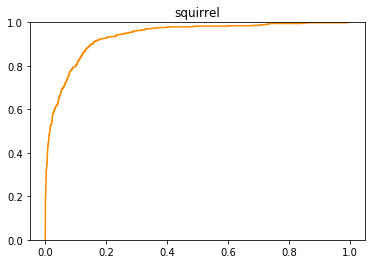

In [114]:
thresh = 0.5

for labelnum in range(len(data.classes)):
    label = data.classes[labelnum]
    label_probs = preds[0][:, labelnum]
    has_label = np.array([labelnum in item for item in learn.data.valid_ds.y.items])

    label_pred = label_probs > thresh
    tp = sum(has_label & np.array(label_pred))
    tn = sum(~has_label & ~np.array(label_pred))
    fp = sum(~has_label & np.array(label_pred))
    fn = sum(has_label & ~np.array(label_pred))
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    print(f"accuracy at {100*thresh}%: {accuracy}")
    print(f"precision at {100*thresh}%: {precision}")
    print(f"recall at {100*thresh}%: {recall}")

    fpr, tpr = roc_curve(label_probs, Tensor(has_label))
    fig, ax = plt.subplots()
    ax.plot(fpr, tpr, color="darkorange")
    ax.set(title=label, ylim=[0, 1])
    plt.show()

accuracy at 0.5%: 0.8399854532230203
precision at 0.5%: 0.818863570810499
recall at 0.5%: 0.9184729860886445


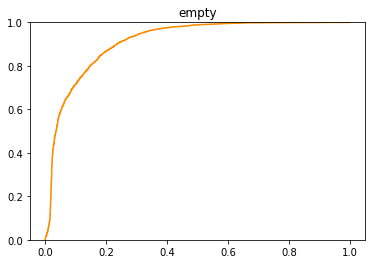

In [112]:
label = "empty"
label_probs = (1 - preds[0]).prod(axis=1)
has_label = np.array([not item for item in learn.data.valid_ds.y.items])


label_pred = label_probs > thresh
tp = sum(has_label & np.array(label_pred))
tn = sum(~has_label & ~np.array(label_pred))
fp = sum(~has_label & np.array(label_pred))
fn = sum(has_label & ~np.array(label_pred))
precision = tp / (tp + fp)
recall = tp / (tp + fn)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f"accuracy at {thresh}%: {accuracy}")
print(f"precision at {thresh}%: {precision}")
print(f"recall at {thresh}%: {recall}")

fpr, tpr = roc_curve(label_probs, Tensor(has_label))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color="darkorange")
ax.set(title=label, ylim=[0, 1])
plt.show()